In [10]:
import torch
import os
import random
import numpy as np
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
def set_seed(seed=1):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
set_seed(1)

## 1. 图像基本操作

(449, 500)


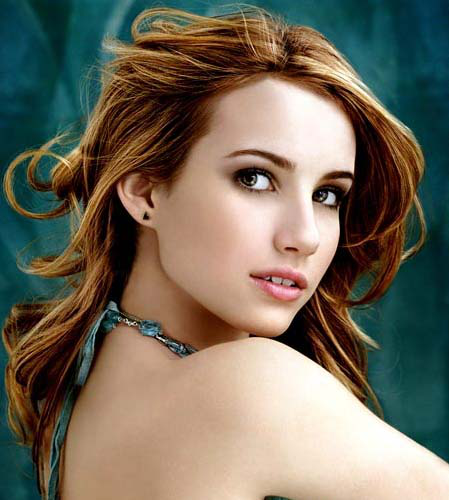

In [133]:
imgpath = "/home/bruce/Downloads/nms.jpg"
img = Image.open(imgpath)
print(img.size)
img

### 1.1 图像转换

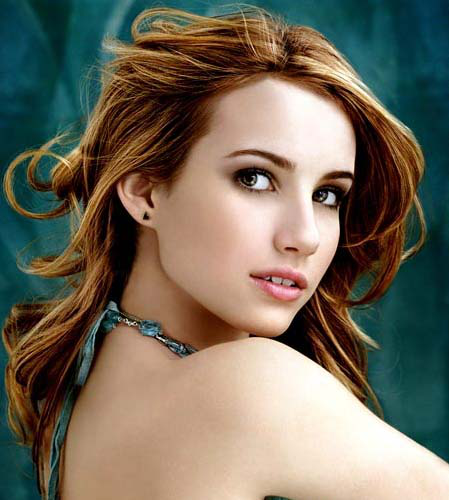

In [134]:
transform = transforms.Compose([transforms.ToTensor(),  # Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor
                               transforms.ToPILImage()])  # Convert a tensor or an ndarray to PIL Image.
new_img = transform(img)
new_img

In [135]:
type(new_img)

PIL.Image.Image

In [136]:
img.mode

'RGB'

### 1.2 图像尺寸定义 Resize

(224, 224)


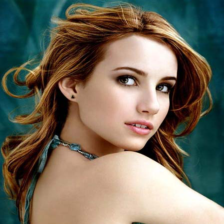

In [137]:
transform = transforms.Compose([transforms.Resize((224, 224)),
                               transforms.ToTensor(),
                               transforms.ToPILImage()])
re_img = transform(img)
print(re_img.size)
re_img

## 2.图像裁剪

### 2.1 图像随机裁剪 RandomCrop

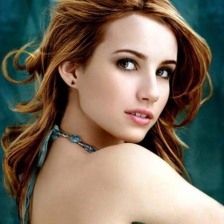

In [138]:
transform = transforms.Compose([transforms.Resize(224),  # 先缩放到224, 然后进行随机裁剪,上下左右填充值为0, 然后再随机裁剪
                               transforms.RandomCrop(224, padding=4),
                               transforms.ToTensor(),  # 归一化操作
                               transforms.ToPILImage()])
randomClipImg = transform(img)
randomClipImg

### 2.2 中心裁剪 centerCrop

(224, 224)


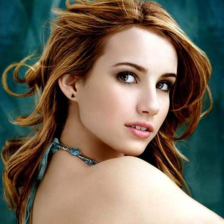

In [139]:
transform = transforms.Compose([transforms.Resize(224),  # 先缩放到224, 然后进行随机裁剪,上下左右填充值为0, 然后再随机裁剪
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),  # 归一化操作
                               transforms.ToPILImage()])
centerClipImg = transform(img)
print(centerClipImg.size)
centerClipImg


### 2.3 随机长宽比裁剪 RandomResizedCrop
#### 随机长宽比裁剪原始图片,将图片设定到size

(224, 224)


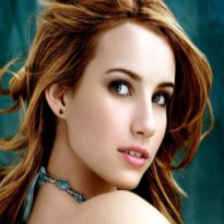

In [166]:
transform = transforms.Compose([transforms.Resize(224),  # 先缩放到224, 然后进行随机裁剪,上下左右填充值为0, 然后再随机裁剪
                               transforms.RandomResizedCrop(224),
                               transforms.ToTensor(),  # 归一化操作
                               transforms.ToPILImage()])
centerClipImg = transform(img)
print(centerClipImg.size)
centerClipImg

### 2.4 FiveCrop 
#### 上下左右中心裁剪,返回的的是5个裁剪后的图片

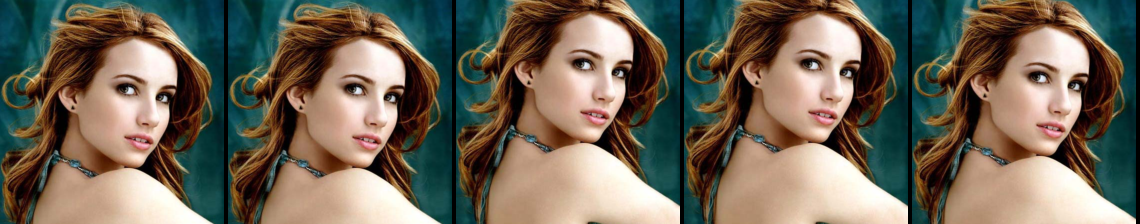

In [141]:
transform = transforms.Compose([
    transforms.Resize(224),  # 先对原始图片进行缩放,缩放到224尺寸,然后再进行裁剪即可
    transforms.FiveCrop(224),
                               ])
ClipImg = transform(img)
delta = 20
top_right = 0
UNIT_SIZE=224
new_img_2 = Image.new("RGB", (UNIT_SIZE*5+delta, 224))
for im in ClipImg:
    new_img_2.paste(im, (top_right, 0)) # 将image复制到target的指定位置中
    top_right += UNIT_SIZE + int(delta/5) # 左上角的坐标，因为是横向的图片，所以只需要 x 轴的值变化就行
new_img_2

### 2.5 上下左右中心裁剪后翻转 TenCrop
#### 对图片进行上下左右中心裁剪,然后全部翻转(水平或者是垂直)一共返回10张图片

(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)


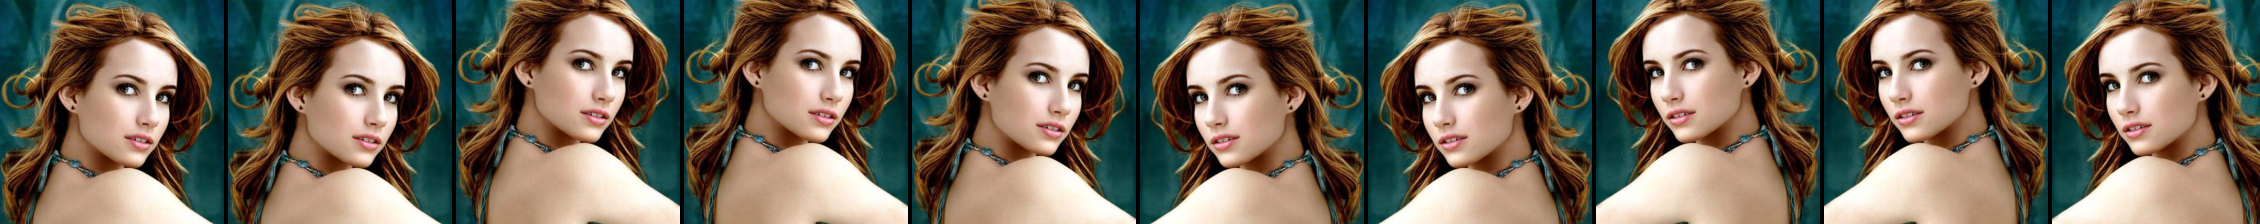

In [165]:
transform = transforms.Compose([
    transforms.Resize(224),  # 先对原始图片进行缩放,缩放到224尺寸,然后再进行裁剪即可
    transforms.TenCrop(224),
                               ])
ClipImg = transform(img)
delta = 20
top_right = 0
UNIT_SIZE=224
new_img_2 = Image.new("RGB", (UNIT_SIZE*10+delta, 224))
for im in ClipImg:
    new_img_2.paste(im, (top_right, 0)) # 将image复制到target的指定位置中
    top_right += UNIT_SIZE + int(delta/5) # 左上角的坐标，因为是横向的图片，所以只需要 x 轴的值变化就行
new_img_2

## 3. 图像翻转和旋转

### 3.1 依概率水平翻转
#### 依据概率p对PIL图片进行水平翻转, p默认的值是0.5

(224, 249)


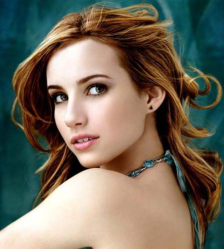

In [172]:
transform = transforms.Compose([transforms.Resize(224),  # 先缩放到224, 然后进行随机裁剪,上下左右填充值为0, 然后再随机裁剪
                               transforms.RandomHorizontalFlip(p=0.9),
                               transforms.ToTensor(),  # 归一化操作
                               transforms.ToPILImage()])
pFlipImg = transform(img)
print(pFlipImg.size)
pFlipImg

### 3.2 依概率垂直翻转
#### 依据概率p对PIL图片进行垂直翻转, p默认的值是0.5

(224, 224)


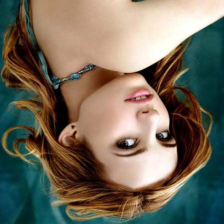

In [194]:
transform = transforms.Compose([
    # 先缩放到224, 然后进行随机裁剪,上下左右填充值为0, 然后再随机裁剪,如果是一个数224, 那么其实按照比例来缩放,不是224x224,是224x250
    transforms.Resize((224, 224)),  
                               transforms.RandomVerticalFlip(p=0.5),
                               transforms.ToTensor(),  # 归一化操作
                               transforms.ToPILImage()])
pFlipImg = transform(img)
print(pFlipImg.size)
pFlipImg